<a href="https://colab.research.google.com/github/shrutin0492/eo-st1/blob/main/eo_st1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Dataset and basics


In [ ]:
#importing basic libraries
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#Data spliting tools
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

In [ ]:
#importing all the models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [ ]:
#reading the dataset & decribing it
weather_df = pd.read_csv('/content/bengaluru.csv', parse_dates=['date_time'], index_col='date_time')
weather_df.tail(5)
weather_df.columns
weather_df.describe()
weather_df.isnull().any()
weather_df_num=weather_df.loc[:,['maxtempC','mintempC','HeatIndexC','uvIndex.1','FeelsLikeC','WindChillC','tempC' ]]
weather_df_num.head()
weather_df_num.shape
weather_df_num.columns


Index(['maxtempC', 'mintempC', 'HeatIndexC', 'uvIndex.1', 'FeelsLikeC',
       'WindChillC', 'tempC'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96432 entries, 2009-01-01 00:00:00 to 2020-01-01 23:00:00
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   maxtempC           96432 non-null  int64  
 1   mintempC           96432 non-null  int64  
 2   totalSnow_cm       96432 non-null  float64
 3   sunHour            96432 non-null  float64
 4   uvIndex            96432 non-null  int64  
 5   uvIndex.1          96432 non-null  int64  
 6   moon_illumination  96432 non-null  int64  
 7   moonrise           96432 non-null  object 
 8   moonset            96432 non-null  object 
 9   sunrise            96432 non-null  object 
 10  sunset             96432 non-null  object 
 11  DewPointC          96432 non-null  int64  
 12  FeelsLikeC         96432 non-null  int64  
 13  HeatIndexC         96432 non-null  int64  
 14  WindChillC         96432 non-null  int64  
 15  WindGustKmph       96432 non-null  

array([<Axes: xlabel='date_time'>, <Axes: xlabel='date_time'>,
       <Axes: xlabel='date_time'>, <Axes: xlabel='date_time'>,
       <Axes: xlabel='date_time'>, <Axes: xlabel='date_time'>,
       <Axes: xlabel='date_time'>], dtype=object)

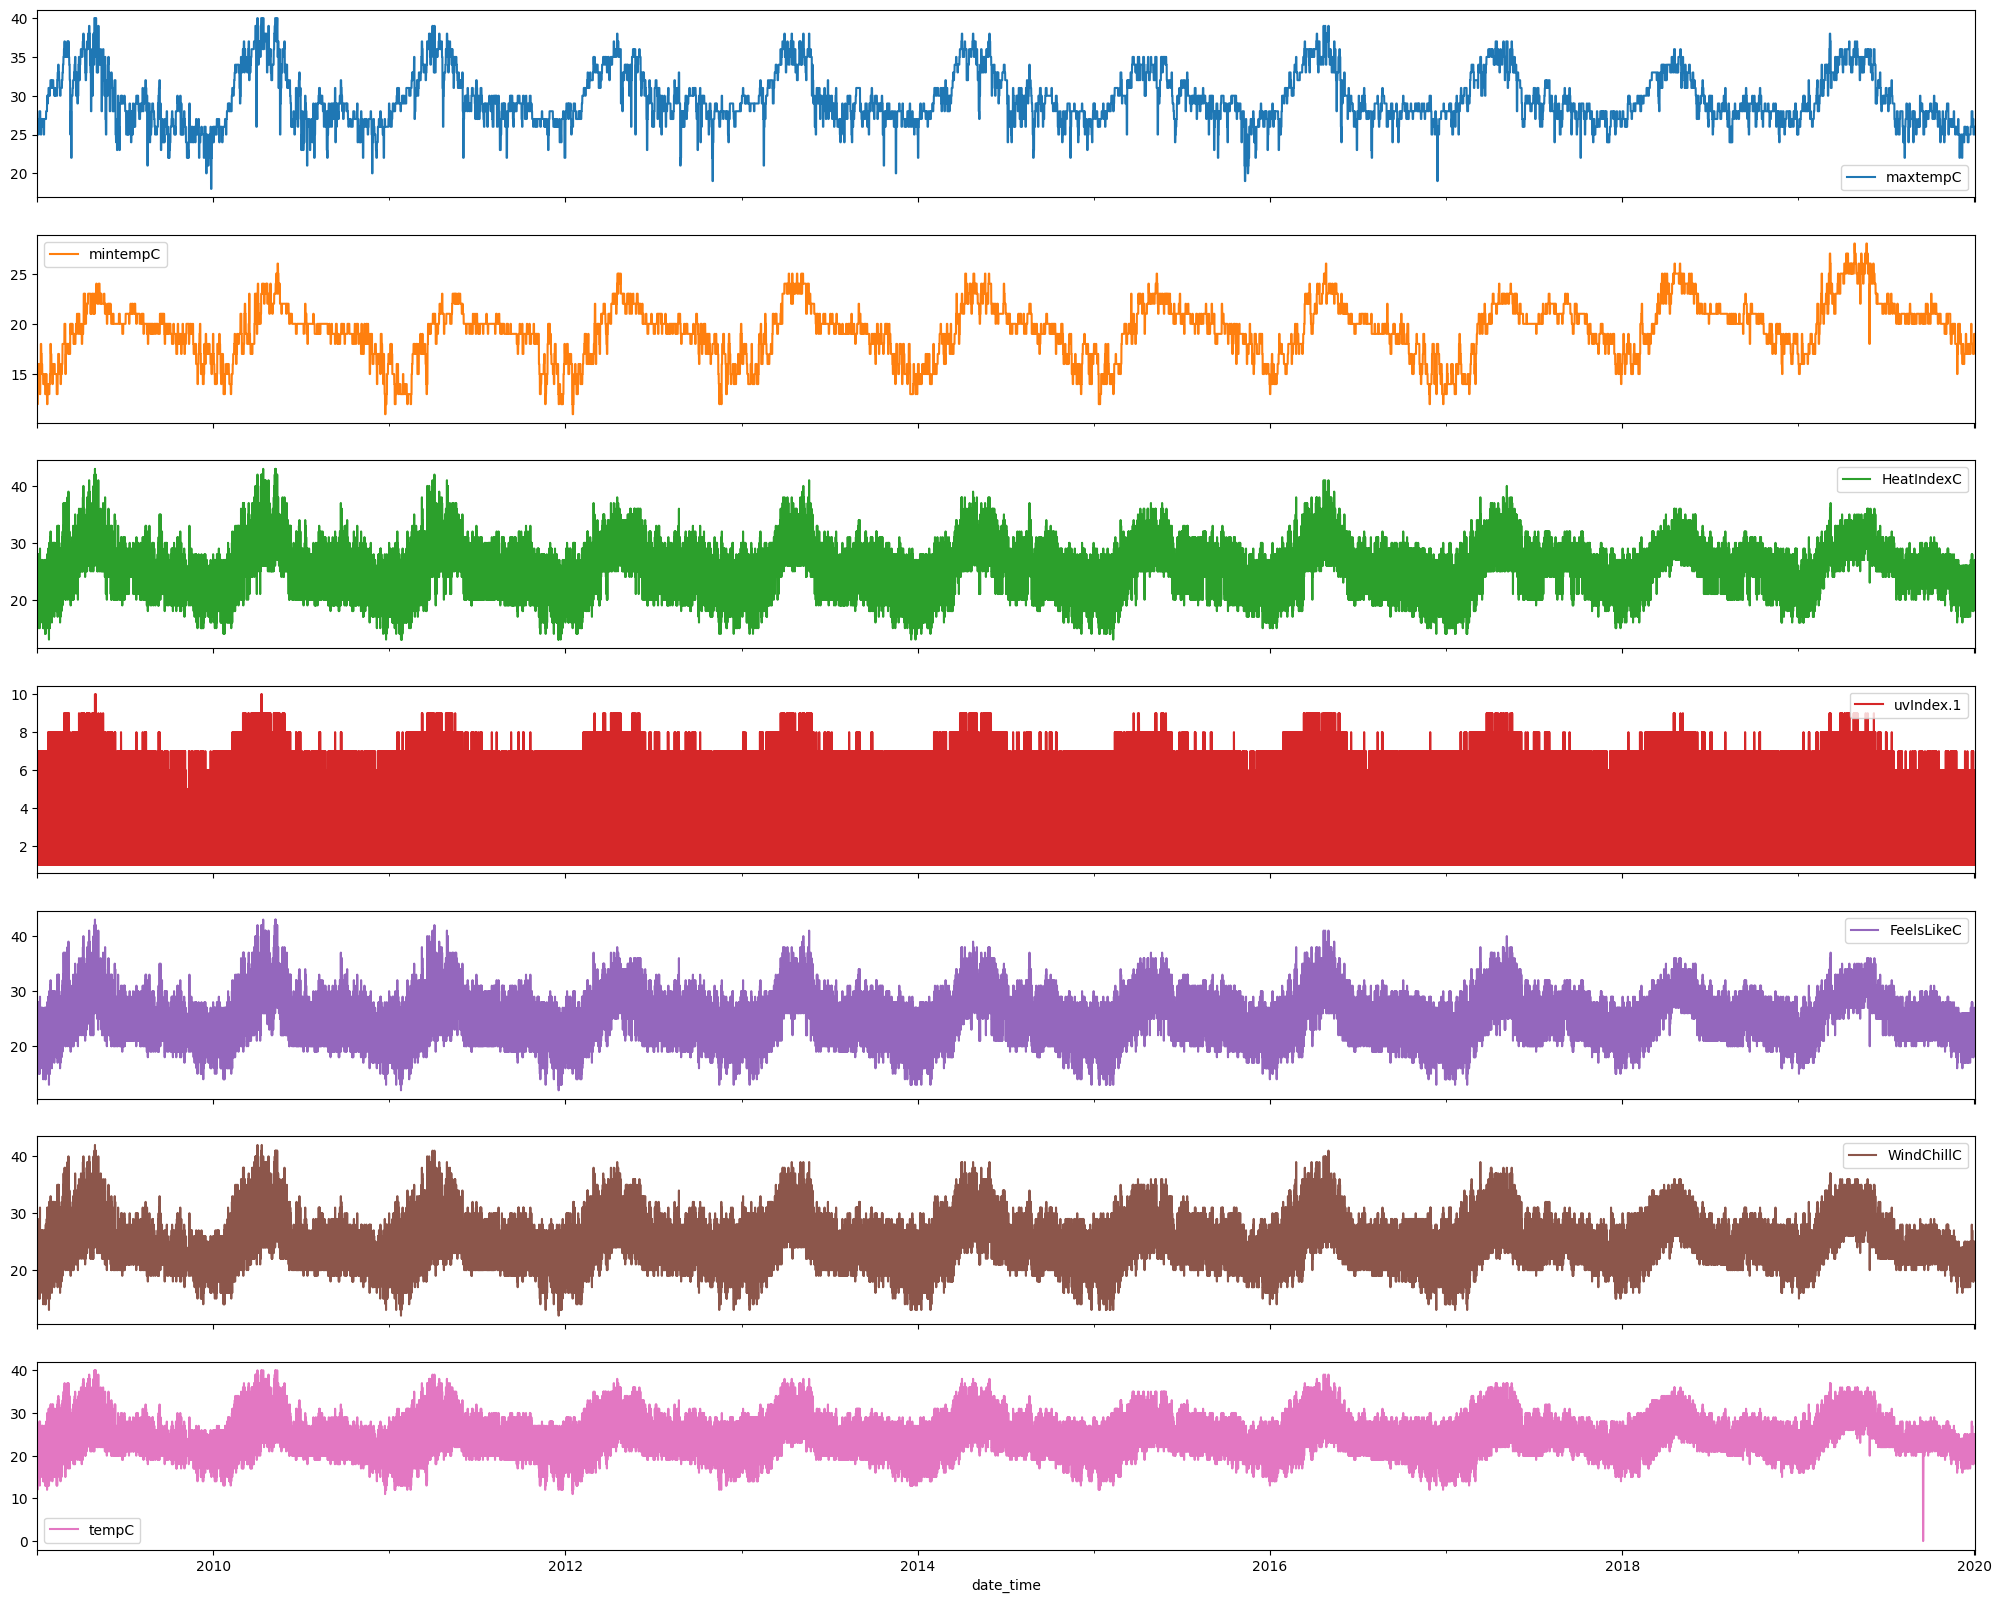

In [ ]:
weather_df.info()
weather_df_num.plot(subplots=True, figsize=(25,20))

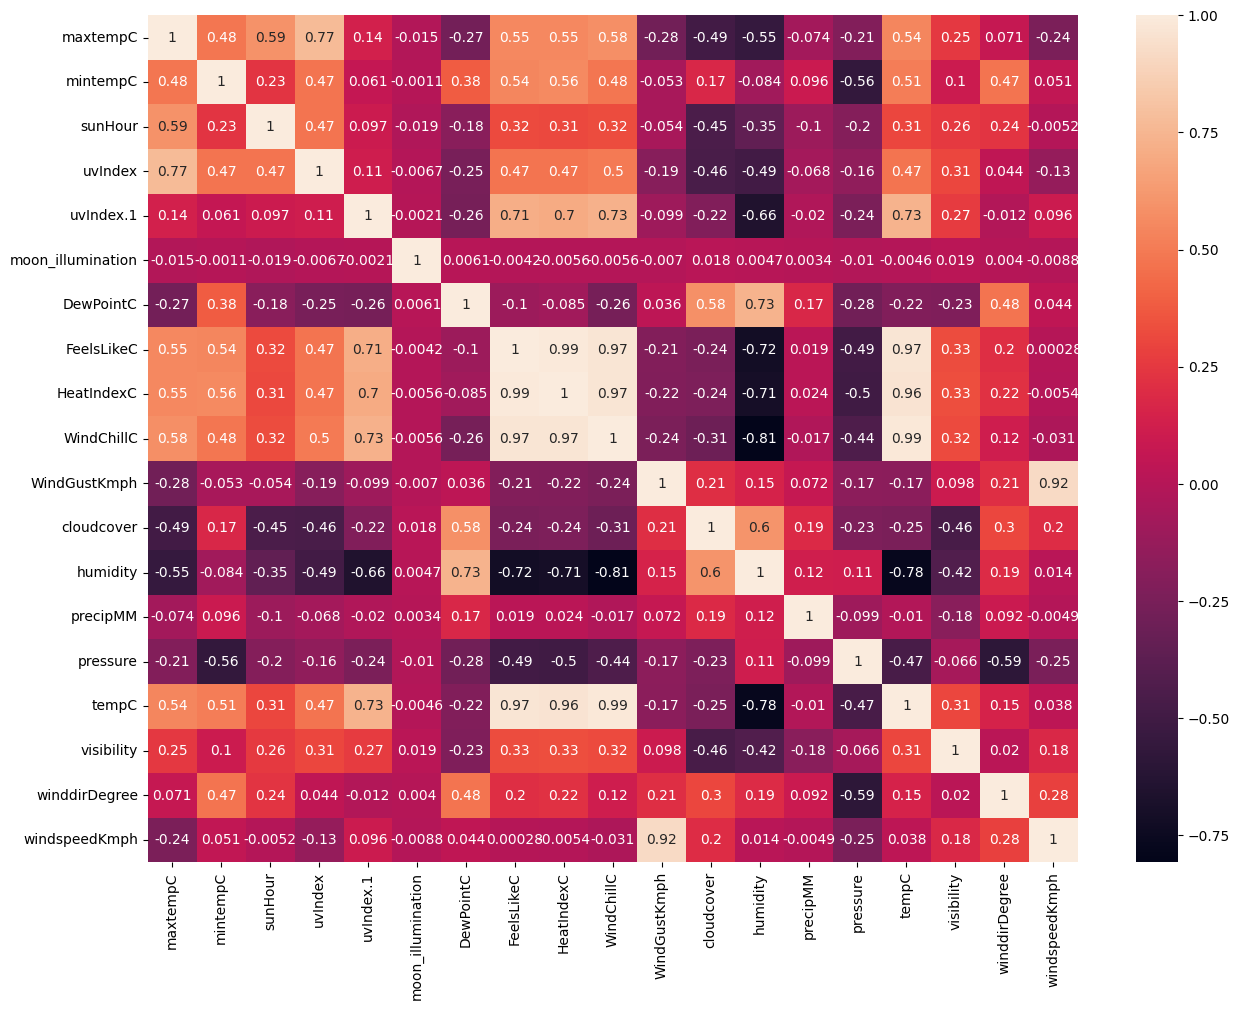

In [ ]:
#heatmap of the correlation matrix
weather_df = weather_df.drop('totalSnow_cm', axis=1)
import seaborn as sns
weather_df_corr = weather_df.corr()
plt.figure(figsize=(15,11))
sns.heatmap(weather_df_corr, annot = True)
plt.show()

In [ ]:

weth=weather_df_num['2019':'2020']
weth.head()

maxtempC  mintempC  HeatIndexC  uvIndex.1  FeelsLikeC  \
date_time                                                                    
2019-01-01 00:00:00        26        16          18          1          18   
2019-01-01 01:00:00        26        16          18          1          18   
2019-01-01 02:00:00        26        16          17          1          17   
2019-01-01 03:00:00        26        16          17          1          17   
2019-01-01 04:00:00        26        16          17          1          17   

                     WindChillC  tempC  
date_time                               
2019-01-01 00:00:00          18     18  
2019-01-01 01:00:00          18     18  
2019-01-01 02:00:00          17     17  
2019-01-01 03:00:00          17     17  
2019-01-01 04:00:00          17     17

In [ ]:
weather_y=weather_df_num.pop("tempC")
weather_x=weather_df_num

In [ ]:
#spliting the data set for training and testing
train_X,test_X,train_y,test_y=train_test_split(weather_x,weather_y,test_size=0.2,random_state=4)
train_X.shape
train_y.shape
train_y.head()

date_time
2012-03-13 07:00:00    26
2009-11-05 21:00:00    20
2017-10-11 22:00:00    23
2019-06-08 11:00:00    29
2019-03-06 05:00:00    26
Name: tempC, dtype: int64

#Linear regression

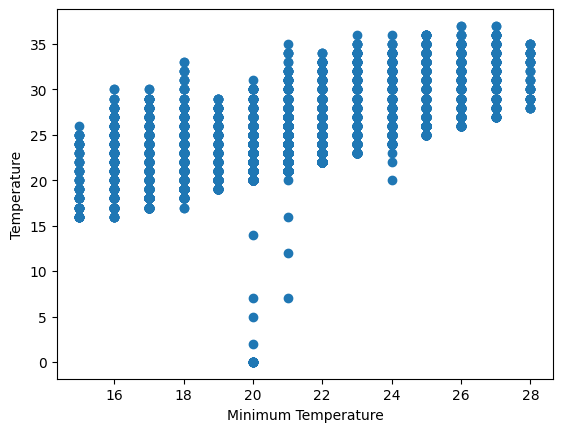

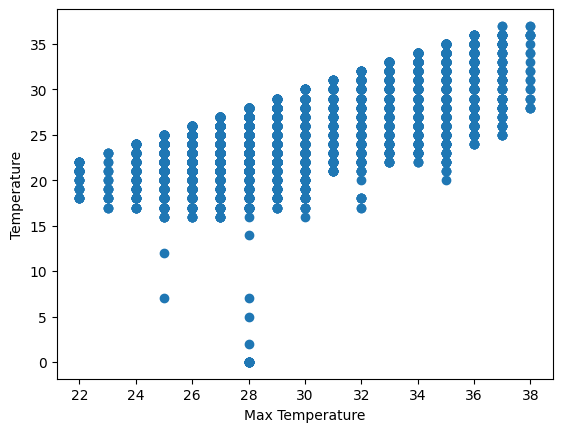

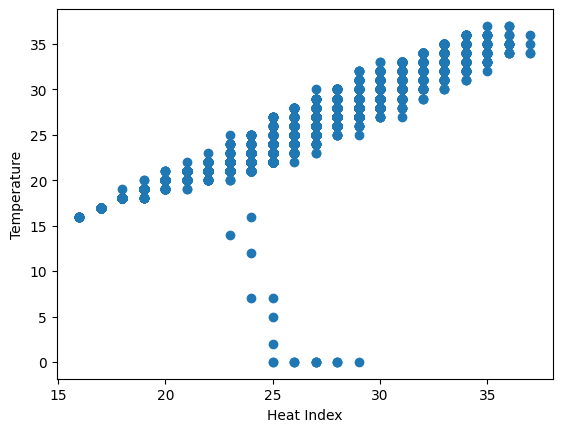

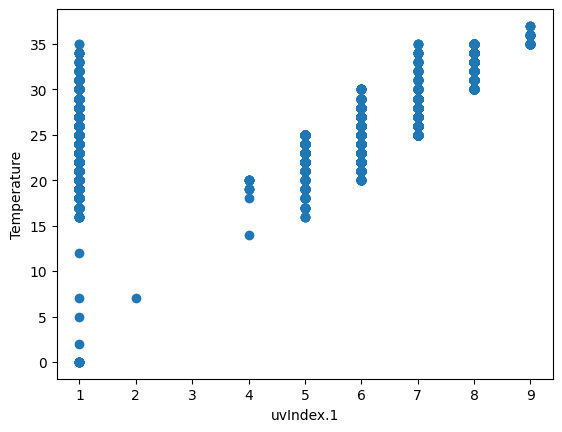

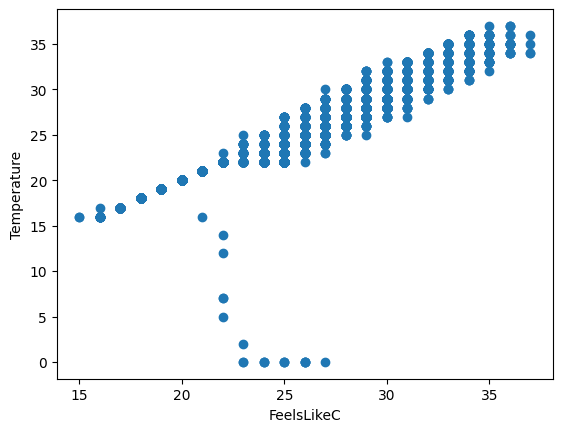

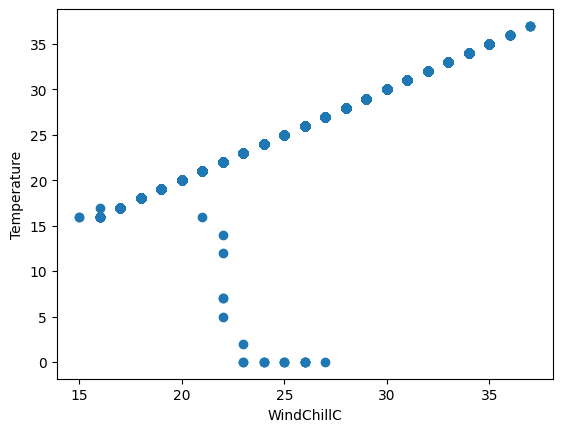

In [ ]:
plt.scatter(weth.mintempC, weth.tempC)
plt.xlabel("Minimum Temperature")
plt.ylabel("Temperature")
plt.show()

plt.scatter(weth.maxtempC, weth.tempC)
plt.xlabel("Max Temperature")
plt.ylabel("Temperature")
plt.show()

plt.scatter(weth.HeatIndexC, weth.tempC)
plt.xlabel("Heat Index")
plt.ylabel("Temperature")
plt.show()

plt.scatter(weth['uvIndex.1'], weth['tempC'])
plt.xlabel("uvIndex.1")
plt.ylabel("Temperature")
plt.show()

plt.scatter(weth.FeelsLikeC, weth.tempC)
plt.xlabel("FeelsLikeC")
plt.ylabel("Temperature")
plt.show()

plt.scatter(weth.WindChillC, weth.tempC)
plt.xlabel("WindChillC")
plt.ylabel("Temperature")
plt.show()

In [ ]:
import time
model=LinearRegression()
start_time = time.time()
model.fit(train_X,train_y)
prediction = model.predict(test_X)
end_time = time.time()
print("Execution Time: %.2f seconds" % (end_time - start_time))
np.mean(np.absolute(prediction-test_y))
print('Variance score: %.2f' % model.score(test_X, test_y))


Execution Time: 0.05 seconds
Variance score: 0.97


In [ ]:
import plotly.graph_objs as go


for i in range(len(prediction)):
    prediction[i] = round(prediction[i], 2)

results = pd.DataFrame({'Actual': test_y, 'Prediction': prediction})
results['Difference'] = (results['Actual'] - results['Prediction']).round(4)
results['Percentage Error'] = ((results['Difference'] / results['Actual']) * 100).round(2).astype(str) + '%'

fig = go.Figure(data=[go.Table(
    header=dict(values=list(results.columns)),
    cells=dict(values=[results.Actual, results.Prediction, results['Difference'], results['Percentage Error']])
)])

table_trace = go.Table(
    header=dict(values=list(results.columns)),
    cells=dict(values=[results.Actual, results.Prediction, results['Difference'], results['Percentage Error']])
)

fig = go.Figure(data=[table_trace])


fig.update_layout(
    width=600,
    height=400
)


fig.show()



In [ ]:
import plotly.graph_objs as go

# Round the predicted values
rounded_predictions = [round(pred, 2) for pred in prediction]

# Create a trace for actual values
trace_actual = go.Scatter(
    x=test_y.index,
    y=test_y,
    mode='markers',
    name='Actual'
)

# Create a trace for predicted values
trace_predicted = go.Scatter(
    x=test_y.index,
    y=rounded_predictions,
    mode='markers',
    name='Predicted'
)

# Create the layout
layout = go.Layout(
    title='Actual vs Predicted',
    xaxis=dict(title='Index'),
    yaxis=dict(title='Value')
)

# Create the data list
data = [trace_actual, trace_predicted]

# Create the figure
fig = go.Figure(data=data, layout=layout)

# Show the figure
fig.show()

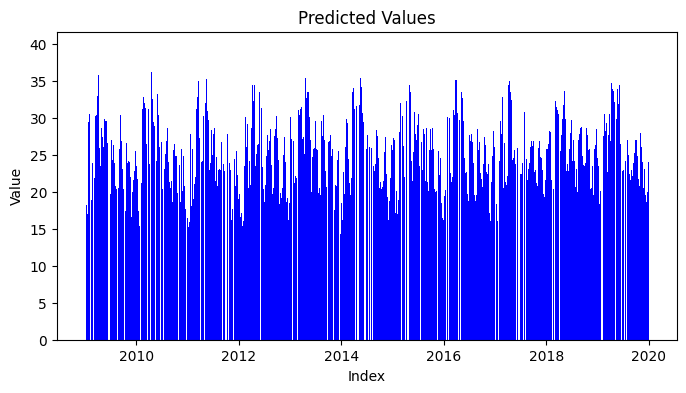

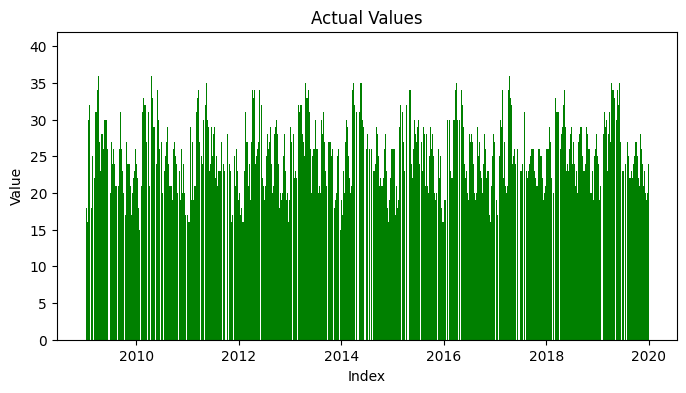

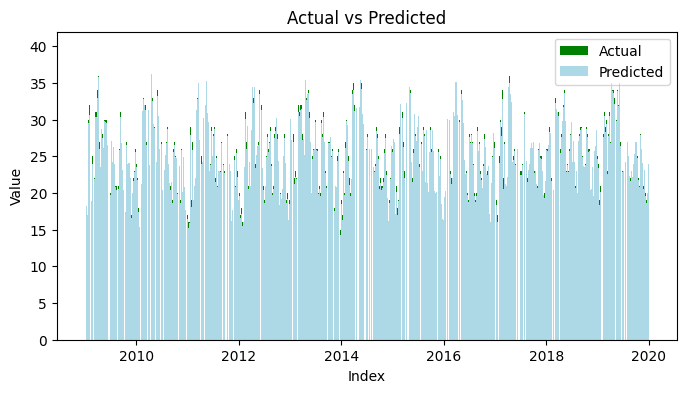

In [ ]:
import matplotlib.pyplot as plt

# Plot for predicted values
plt.figure(figsize=(8, 4))
plt.bar(test_y.index,prediction, width=0.4, color='blue')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Predicted Values')
plt.show()

# Plot for actual values
plt.figure(figsize=(8, 4))
plt.bar(test_y.index, test_y, width=0.4, color='green')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Actual Values')
plt.show()

# Plot with both actual and predicted values
plt.figure(figsize=(8, 4))
plt.bar(test_y.index, test_y, width=0.4, color='green', label='Actual')
plt.bar(test_y.index, prediction, width=0.4, color='#ADD8E6', label='Predicted')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

In [ ]:
model = LinearRegression()
#['maxtempC','mintempC','HeatIndexC','uvIndex.1','FeelsLikeC','WindChillC']
new_value = np.array([[32.4,22.7,34.2,8,34.2,33.4]])

model.fit(train_X,train_y)
prediction = model.predict(new_value)
print("Predicted value:", prediction)

Predicted value: [33.04757049]


In [ ]:
from sklearn.metrics import r2_score
print("Mean absolute error: %.4f" % np.mean(np.absolute(prediction - test_y)))
print("Residual sum of squares (MSE): %.4f" % np.mean((prediction - test_y) ** 2))
print("R2-score: %.4f" % r2_score(test_y, prediction))
print("Execution Time: %.2f seconds" % (end_time - start_time))

Mean absolute error: 0.4770
Residual sum of squares (MSE): 0.5712
R2-score: 0.9725
Execution Time: 0.05 seconds


#Decision Tree

In [ ]:
import time
from sklearn.tree import DecisionTreeRegressor
start_time = time.time()
regressor=DecisionTreeRegressor(random_state=0)
regressor.fit(train_X,train_y)
prediction2=regressor.predict(test_X)
end_time = time.time()
print("Execution Time: %.2f seconds" % (end_time - start_time))
np.mean(np.absolute(prediction2-test_y))


Execution Time: 0.13 seconds


0.38424434237063904

In [ ]:

import numpy as np
import plotly.graph_objs as go


for i in range(len(prediction2)):
    prediction2[i] = round(prediction2[i], 2)

results = pd.DataFrame({'Actual': test_y, 'Prediction': prediction2})
results['Difference'] = results['Actual'] - results['Prediction']
results['Difference'] = np.round(results['Difference'], 4)

results['Percentage Error'] = ((results['Difference'] / results['Actual']) * 100).round(2).astype(str) + '%'

fig = go.Figure(data=[go.Table(
    header=dict(values=list(results.columns)),
    cells=dict(values=[results.Actual, results.Prediction, results['Difference'], results['Percentage Error']])
)])

table_trace = go.Table(
    header=dict(values=list(results.columns)),
    cells=dict(values=[results.Actual, results.Prediction, results['Difference'], results['Percentage Error']])
)

fig = go.Figure(data=[table_trace])

fig.update_layout(
    width=600,
    height=400
)

fig.show()



In [ ]:
import plotly.graph_objs as go

# Round the predicted values
rounded_predictions2 = [round(pred, 2) for pred in prediction2]

# Create a trace for actual values
trace_actual = go.Scatter(
    x=test_y.index,
    y=test_y,
    mode='markers',
    name='Actual'
)

# Create a trace for predicted values
trace_predicted = go.Scatter(
    x=test_y.index,
    y=rounded_predictions2,
    mode='markers',
    name='Predicted'
)

# Create the layout
layout = go.Layout(
    title='Actual vs Predicted',
    xaxis=dict(title='Index'),
    yaxis=dict(title='Value')
)

# Create the data list
data = [trace_actual, trace_predicted]

# Create the figure
fig = go.Figure(data=data, layout=layout)

# Show the figure
fig.show()

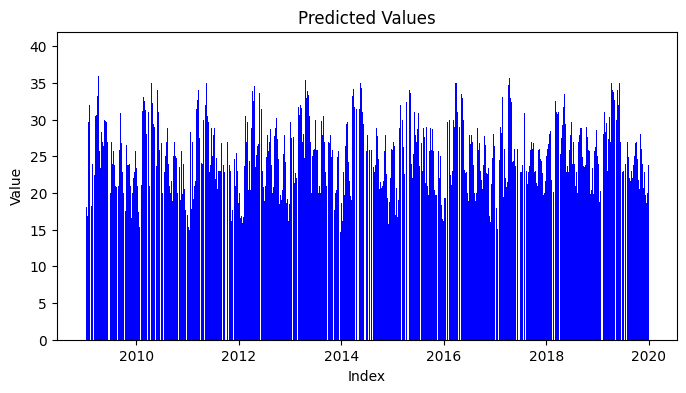

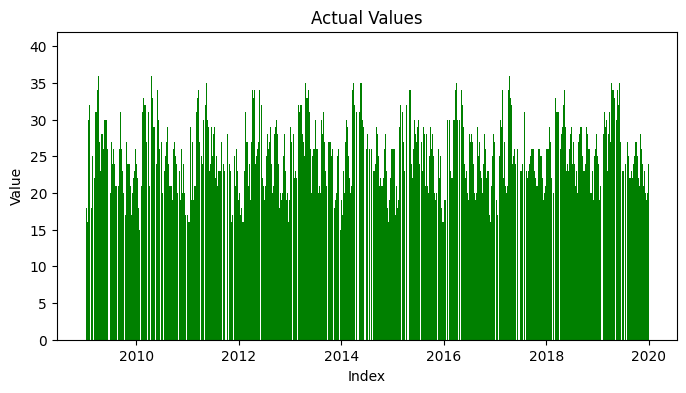

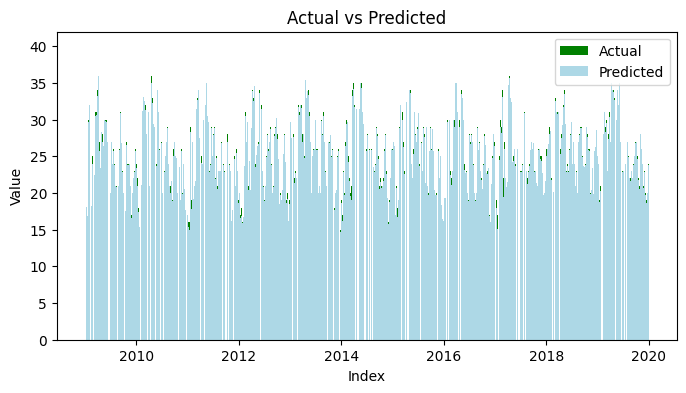

In [ ]:
import matplotlib.pyplot as plt

# Plot for predicted values
plt.figure(figsize=(8, 4))
plt.bar(test_y.index, rounded_predictions2, width=0.4, color='blue')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Predicted Values')
plt.show()

# Plot for actual values
plt.figure(figsize=(8, 4))
plt.bar(test_y.index, test_y, width=0.4, color='green')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Actual Values')
plt.show()

# Plot with both actual and predicted values
plt.figure(figsize=(8, 4))
plt.bar(test_y.index, test_y, width=0.4, color='green', label='Actual')
plt.bar(test_y.index, rounded_predictions2, width=0.4, color='#ADD8E6', label='Predicted')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

In [ ]:
model = DecisionTreeRegressor()
new_value = np.array([[32.4,22.7,34.2,8,34.2,33.4]])
model.fit(train_X,train_y)
prediction = model.predict(new_value)
print("Predicted value:", prediction)

Predicted value: [32.]


In [ ]:
print('Variance score: %.2f' % regressor.score(test_X, test_y))
from sklearn.metrics import r2_score

print("Mean absolute error: %.2f" % np.mean(np.absolute(prediction2 - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((prediction2 - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y,prediction2 ) )#decision tree
print("Execution Time: %.2f seconds" % (end_time - start_time))

Variance score: 0.98
Mean absolute error: 0.38
Residual sum of squares (MSE): 0.34
R2-score: 0.98
Execution Time: 0.13 seconds


#Random forest

In [ ]:
import time
from sklearn.ensemble import RandomForestRegressor
start_time = time.time()
regr=RandomForestRegressor(max_depth=90,random_state=0,n_estimators=100)
regr.fit(train_X,train_y)
prediction3=regr.predict(test_X)
end_time = time.time()
print("Execution Time: %.2f seconds" % (end_time - start_time))
#mean absolute error
np.mean(np.absolute(prediction3-test_y))

Execution Time: 8.63 seconds


0.38276987706567983

In [ ]:

import numpy as np
import plotly.graph_objs as go

# Your existing code...
for i in range(len(prediction3)):
    prediction3[i] = round(prediction3[i], 2)

results = pd.DataFrame({'Actual': test_y, 'Prediction': prediction3})
results['Difference'] = results['Actual'] - results['Prediction']
results['Difference'] = np.round(results['Difference'], 4)

# Calculate percentage error
results['Percentage Error'] = ((results['Difference'] / results['Actual']) * 100).round(2).astype(str) + '%'

fig = go.Figure(data=[go.Table(
    header=dict(values=list(results.columns)),
    cells=dict(values=[results.Actual, results.Prediction, results['Difference'], results['Percentage Error']])
)])

# Create the table trace
table_trace = go.Table(
    header=dict(values=list(results.columns)),
    cells=dict(values=[results.Actual, results.Prediction, results['Difference'], results['Percentage Error']])
)

# Create the figure with the table trace
fig = go.Figure(data=[table_trace])

# Resize the figure
fig.update_layout(
    width=600,  # Specify the desired width in pixels
    height=400  # Specify the desired height in pixels
)

# Display the figure
fig.show()


In [ ]:
import plotly.graph_objs as go

# Round the predicted values
rounded_predictions3 = [round(pred, 2) for pred in prediction3]

# Create a trace for actual values
trace_actual = go.Scatter(
    x=test_y.index,
    y=test_y,
    mode='markers',
    name='Actual'
)

# Create a trace for predicted values
trace_predicted = go.Scatter(
    x=test_y.index,
    y=rounded_predictions3,
    mode='markers',
    name='Predicted'
)

# Create the layout
layout = go.Layout(
    title='Actual vs Predicted',
    xaxis=dict(title='Index'),
    yaxis=dict(title='Value')
)

# Create the data list
data = [trace_actual, trace_predicted]

# Create the figure
fig = go.Figure(data=data, layout=layout)

# Show the figure
fig.show()

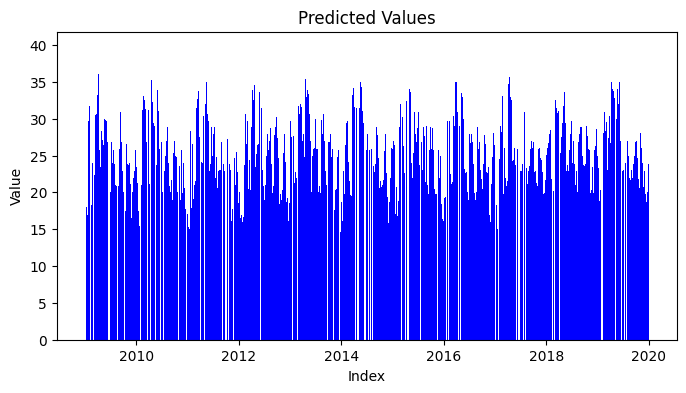

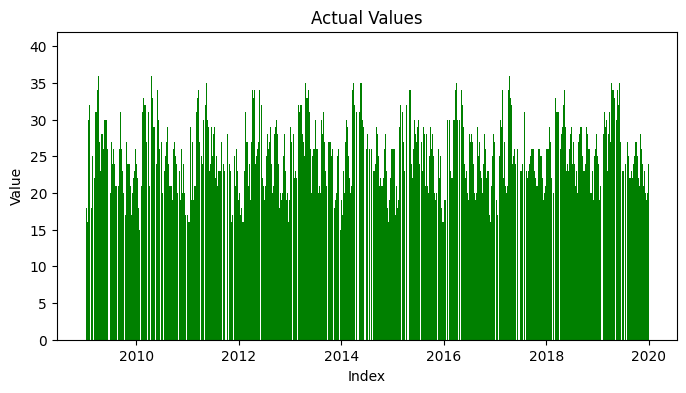

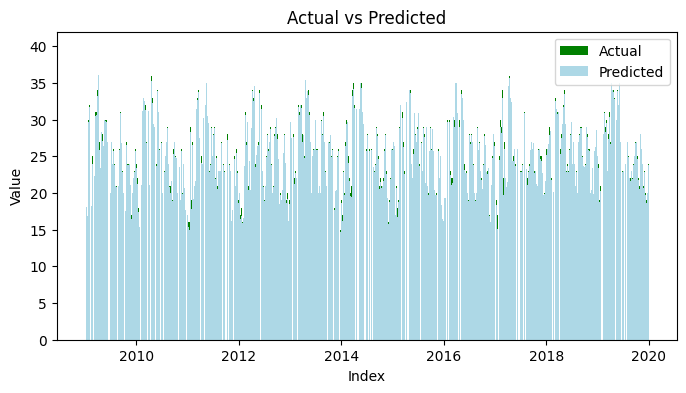

In [ ]:
import matplotlib.pyplot as plt

# Plot for predicted values
plt.figure(figsize=(8, 4))
plt.bar(test_y.index, rounded_predictions3, width=0.4, color='blue')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Predicted Values')
plt.show()

# Plot for actual values
plt.figure(figsize=(8, 4))
plt.bar(test_y.index, test_y, width=0.4, color='green')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Actual Values')
plt.show()

# Plot with both actual and predicted values
plt.figure(figsize=(8, 4))
plt.bar(test_y.index, test_y, width=0.4, color='green', label='Actual')
plt.bar(test_y.index, rounded_predictions3, width=0.4, color='#ADD8E6', label='Predicted')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

In [ ]:
model = RandomForestRegressor()
model.fit(train_X,train_y)
#['maxtempC','mintempC','HeatIndexC','uvIndex.1','FeelsLikeC','WindChillC']

new_value = np.array([[32.4,22.7,34.2,8,34.2,33.4]])
prediction = model.predict(new_value)

print("Predicted value:", prediction)

Predicted value: [32.]


In [ ]:
print('Variance score: %.2f' % regr.score(test_X, test_y))
from sklearn.metrics import r2_score

print("Mean absolute error: %.2f" % np.mean(np.absolute(prediction3 - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((prediction3 - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y,prediction3 ) )#random forest
print("Execution Time: %.2f seconds" % (end_time - start_time))

Variance score: 0.98
Mean absolute error: 0.38
Residual sum of squares (MSE): 0.34
R2-score: 0.98
Execution Time: 8.63 seconds
